# Assignment 1 - practical session

In this notebook, we will cover frequently asked questions during the workgroups. If there are any more questions, feel free to ask them on the Brightspace discussion forum.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Synthetic Data
This is some example synthetic data.

In [16]:
simulated_data = np.loadtxt('simulated_data_(lon,lat).csv', delimiter=',')

In [17]:
simulated_data = np.loadtxt('simulated_data (single column).csv', delimiter=',')

Now let's investigate the kind of data we have a bit.

In [18]:
print(type(simulated_data))
print(simulated_data.shape)
print(simulated_data[0:5])
print(simulated_data.shape[0] // 365, 'records per day')
print(simulated_data.shape[0] // (365 * 24), 'records per hour')

<class 'numpy.ndarray'>
(52560,)
[2732.33393733 2732.33393733 2732.33393733 2732.33393733 2732.33393733]
144 records per day
6 records per hour


## 2. Temporal Autocorrelation
Normal temporal autocorrelation:

$$ACF_\tau = \frac{1}{T - \tau} \sum_{t=1}^{T-\tau} (x_t - \bar{x})(x_{t+\tau} - \bar{x})$$

Circular temporal autocorrelation:

$$ACF_\tau = \frac{1}{T} \sum_{t=1}^{T} (x_t - \bar{x})(x_{MOD(t+\tau, T)} - \bar{x})$$

Breakdown of the symbols:

- $\tau$ the lag that we're computing the autocorrelation for
- $T$ the total length of our time series
- $t$ a specific moment in time
- $x$ a vector of two elements (longitude, latitude) indicating a point in space
- $x_t$ the value of $x$ at time $t$, so a point in space and time
- $\bar{x}$ the mean value of $x$ in all our observations

The multiplication $(x_t - \bar{x})(x_{t+\tau} - \bar{x})$ is the dot product (or "inner product" or "scalar product") of these vectors.

#### Dominant peaks: 
We're looking for "unique" dominant peaks, such as one-day and one-week peaks. But of course the data is repetitive so you'll also get a peak in two weeks, which is probably going to be higher than the one for a single day (depending on your data).  So you have to do some plotting to find out when the pattern repeats itself and select a representative segment, and extract the dominant peaks from that. There are multiple correct solutions for this problem, try to be creative!

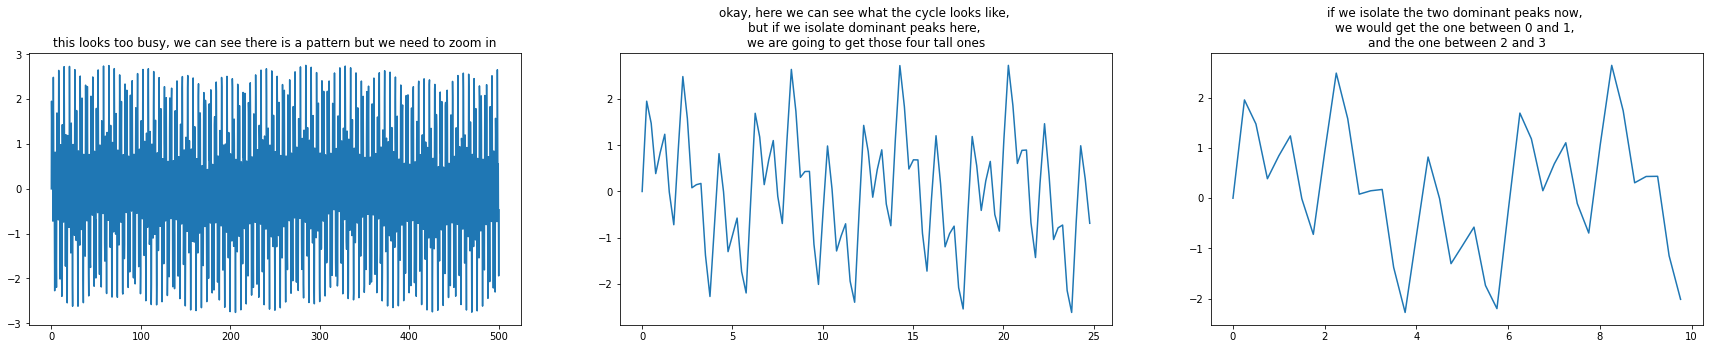

In [14]:
x = np.linspace(0, 500, 1999)
y = np.sin(x) + np.sin(x * np.pi)  + np.sin(x * np.pi * 2)  # some periodic data to demonstrate the idea

fig, ax = plt.subplots(1, 3, figsize=(30,5))

ax[0].plot(x, y)  # first exploration
ax[0].set_title('this looks too busy, we can see there is a pattern but we need to zoom in')

ax[1].plot(x[:100], y[:100])  # narrowing it down a bit
ax[1].set_title('okay, here we can see what the cycle looks like, \nbut if we isolate dominant peaks here, \nwe are going to get those four tall ones')

ax[2].plot(x[:25], y[:25])  # zooming in even further
ax[2].set_title('if we isolate the two dominant peaks now, \nwe would get the one between 0 and 1, \nand the one between 2 and 3')
plt.show()

## 3. Periodograms

You don't have to write your own periodogram function. We recommend using `scipy.signal.periodogram()` .

There is documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html , but the plot example there is perhaps more advanced than necessary for our purposes. Try using a simpler plot instead to get an understanding of the results.

Periodograms can have frequencies or periods on the X axis. You can convert frequencies to periods using $period =\frac{1}{frequency}$. Note that frequency arrays often start at 0Hz, but if you use this equation to convert to periods, you'll get a divide by zero error. You can deal with that by removing that element from the results. *Why is there a peak at frequency of 0? This is called the DC term that results from a Fourier Transform (which is used in periodogram functions). See this <a href="https://dsp.stackexchange.com/questions/12972/discrete-fourier-transform-what-is-the-dc-term-really"> discussion </a> and the slides of lecture 2 for more information.*

Remember that $\frac{24\ hours}{10\ minutes} = 144$ and that $\frac{168\ hours}{10\ minutes} = 1008$ so if you get peaks around those periods, you might want to re-scale the display units of your X-axis from 10-minute units to hours.

The key to this exercise is getting a periodogram plot that you can interpret and draw conclusions from.


## 4. Performance / Noise
There is no single one correct answer to how to do this. Rather, come up with your own methods and explain why they make sense.

## 5. Real World Data

Most participants have some missing data. Possible strategies for missing data:

- assume a person stays at the last known point until they teleport to the next observation
- take the (weighted) mean between previous and next destination
- put them at their most frequent location (home)
- something else you come up with

Whatever you do, put in your report what you did and why you think that's reasonable!